# -------------Experiment - 11-----------

# Consider the Mall customer dataset and perform the following operations.

## a) Using Elbow method find the optimal numbers of clusters.
## b) Train a k-mean cluster algorithm and training dataset.
## c) Evaluate the model using Inertia and other metrics.

In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Read csv file

df=pd.read_csv("C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Pre-processing

# Show the missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Select features for clustering
# You might try different combinations. Common: Annual Income & Spending Score

X=df[['Annual Income (k$)','Spending Score (1-100)']].values

In [6]:
# Optionally scale features (helps if scales differ a lot)

scaler = StandardScaler()
x = scaler.fit_transform(X)

## a) Using Elbow method find the optimal numbers of clusters.

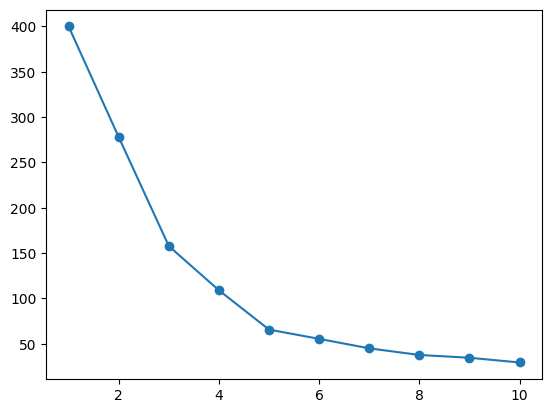

In [7]:
# Elbow method 

wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')   
plt.show()

## b) Train a k-mean cluster algorithm and training dataset.

In [8]:
# Fit the model 

k_me=KMeans(n_clusters=5,random_state=0)
labels=k_me.fit_predict(x)

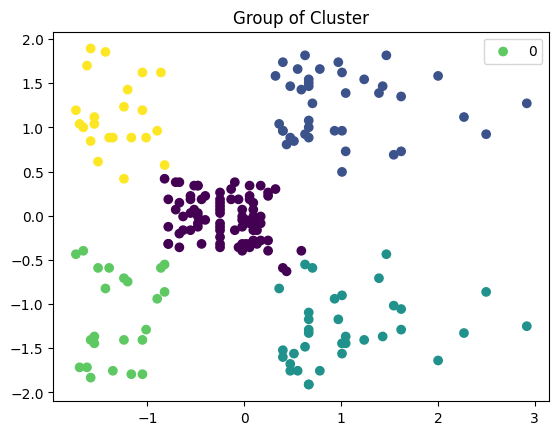

In [9]:
# Visualize clusters

plt.scatter(x[:,0],x[:,1],c=labels)
plt.title("Group of Cluster")
plt.legend([0,1,2,3,4])
plt.show()

## c) Evaluate the model using Inertia and other metrics.

In [10]:
# Metrics 

# Inertia (Within-Cluster Sum of Squares)

print("inertia is :",km.inertia_)

inertia is : 29.314635144348664


In [11]:
# silhouette_score

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(x,labels)
print("silhouette_score is :",sil_score)

silhouette_score is : 0.5546571631111091


In [13]:
# Other Metrics 

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Assuming x is the standardized features and labels is cluster
db_score = davies_bouldin_score(x,labels)
ch_score = calinski_harabasz_score(x,labels)


print("Davies-Bouldin Index:", db_score)
print("Calinski-Harabasz Index:", ch_score)


Davies-Bouldin Index: 0.5722356162263352
Calinski-Harabasz Index: 248.64932001536357
